## Support Vector Machines
Support Vector Machines (SVM) are a method that uses points in a transformed problem space that best separate classes into two groups. Classification for multiple classes is then supported by a one-vs-all method.
1. Introduction to Support Vector Machines
2. SVM General Explanation
3. Computing the Hyperplane
4. Additional Math Resources
5. SVM with Scikit Learn
6. Additional Resources


Imagining a situation in which we want to separate a training set with two classes. We have two classes in our set: blue and red. We plot them out in the feature space and we try to place a green line that separates both classes.

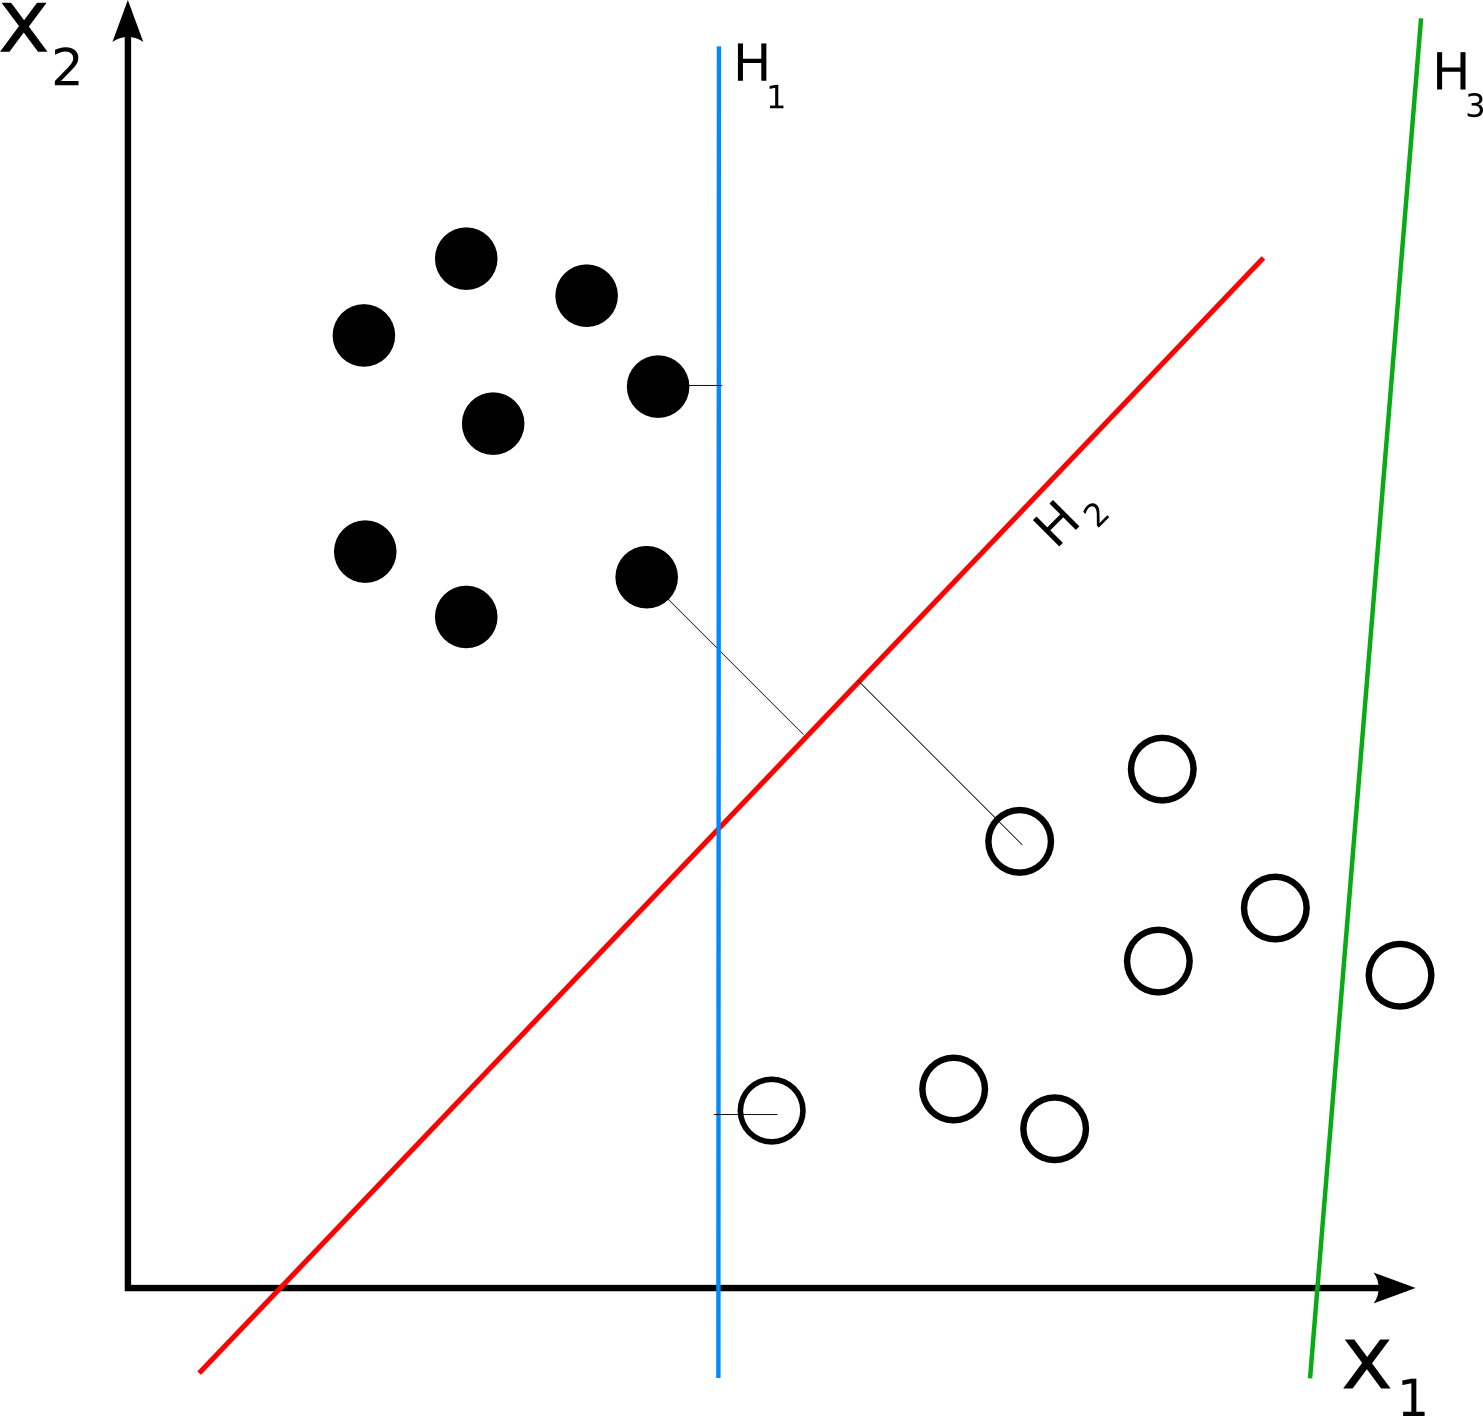

In [1]:
from IPython.display import Image
url = 'https://upload.wikimedia.org/wikipedia/commons/2/20/Svm_separating_hyperplanes.png'
Image(url)

In [2]:
url = 'http://docs.opencv.org/3.0-beta/_images/separating-lines.png'
Image(url=url)

In [3]:
url= 'http://docs.opencv.org/3.0-beta/_images/optimal-hyperplane.png'
Image(url=url)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
Y = iris.target

In [6]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [8]:
model = SVC()

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.4, random_state = 3)

In [11]:
model.fit(X_train, Y_train)

SVC()

In [12]:
from sklearn import metrics

In [13]:
predicted = model.predict(X_test)
expected = Y_test

In [14]:
print(metrics.accuracy_score(expected, predicted))

0.95


In [15]:
from sklearn import svm

In [16]:
X = iris.data[:, :2]
Y = iris.target

In [17]:
C = 1.0

In [18]:
svc = svm.SVC(kernel = 'linear', C = C).fit(X,Y)

In [19]:
rbf_svc = svm.SVC(kernel = 'rbf', gamma = 0.7, C = C).fit(X, Y)

In [20]:
poly_svc = svm.SVC(kernel = 'poly', degree = 3, C=C).fit(X,Y)

In [21]:

lin_svc = svm.LinearSVC(C =C).fit(X,Y)

In [22]:
h = 0.02
x_min = X[:,0].min() - 1
x_max = X[:,0].max() + 1


In [23]:
y_min = X[:,1].min() -1
y_max = X[:,1].max() + 1

In [24]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [25]:
titles = ['SVC with linear kernel',
         'LinearSVC (linear kernel)',
         'SVC with RBF kernel',
         'SVC with polynomial (degree 3) kernel']

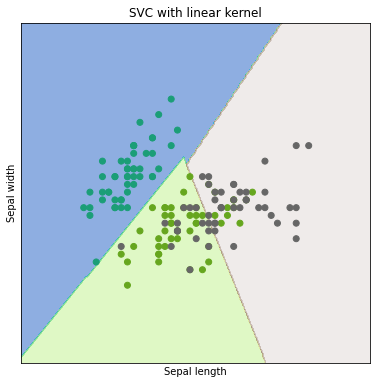

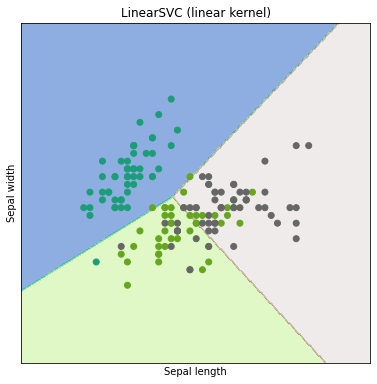

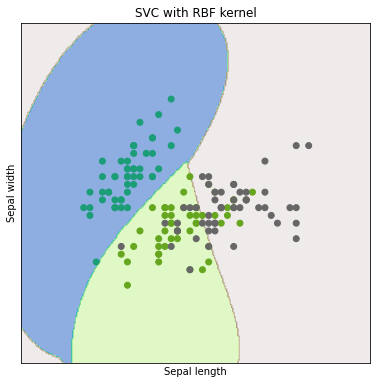

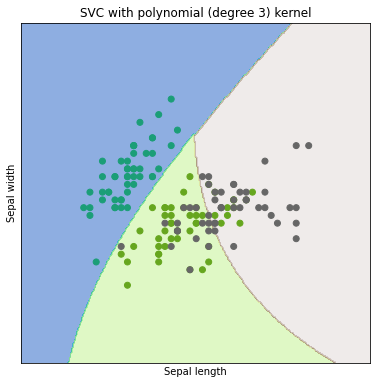

In [26]:
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    plt.figure(figsize =(15,15))
    plt.subplot(2,2, i + 1)
    
    plt.subplots_adjust(wspace = 0.4, hspace = 0.4)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap= plt.cm.terrain, alpha = 0.5, linewidths = 0)
    plt.scatter(X[:,0], X[:, 1], c = Y, cmap = plt.cm.Dark2)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    

## Naive Bayes Classifiers
1. Note on Notation and Math Terms
2. Bayes' Theorem
3. Introduction to Naive Bayes
4. Naive Bayes Classifier Mathematics Overview
5. Constructing a classifier from the probability model
6. Gaussian Naive Bayes
7. Gaussian Naive Bayes with Scikit Learn


Bayes' Theorem describes the probability of an event, based on prior knowledge of conditions that might be related to the event. For example, if the risk of developing health problems is known to increase with age, Bayes' theorem allows the risk to an individual of a known age to be assessed more accurately than simply assuming that the individual is typical of the population as a whole.

In [27]:
from IPython.display import Image
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/1/18/Bayes%27_Theorem_MMB_01.jpg/220px-Bayes%27_Theorem_MMB_01.jpg'
Image(url = url)

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes' theorem with the "naive" assumption of independence between every pair of features. 

In [28]:
url = 'https://miro.medium.com/max/1200/0*qFuHAV7Vd09064q-.jpeg'
Image(url = url)

The Naive Bayes classifier combines this model with a decision rule, this decision rule will decide which hypothesis is most probable, in this example case, this will be which class of flower is most probable.
Picking the hypothesis that is most probable is known as the maximum a posteriori or MAP decision rule. The corresponing classifier, a Bayes classifier, is the function that assigns a class label to y.

When dealing with continuous data, a typical assumption is that the continuous values associated with each class are distributed according to a Gaussian distribution.

In [29]:
import pandas as pd
from pandas import Series, DataFrame
from sklearn.naive_bayes import GaussianNB

In [30]:
iris = datasets.load_iris()

In [31]:
X= iris.data
Y = iris.target

In [32]:
model = GaussianNB()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [33]:
model.fit(X_train, Y_train)
pred = model.predict(X_test)

In [34]:
print(metrics.accuracy_score(Y_test, pred))

0.9473684210526315


## Decision Trees and Random Forests

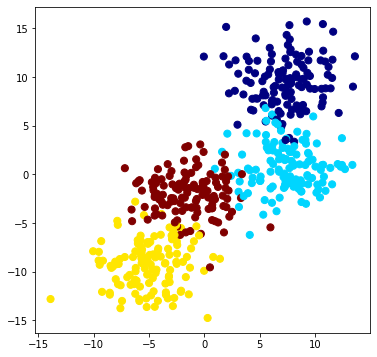

In [35]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 500, centers = 4, random_state = 8, cluster_std = 2.4)

plt.figure(figsize = (6,6))
plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap = 'jet')

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
def visualize_tree(classifier, X, y, boundaries=True,xlim=None, ylim=None):
    '''
    Visualizes a Decision Tree. 
    INPUTS: Classifier Model, X, y, optional x/y limits.
    OUTPUTS: Meshgrid visualization for boundaries of the Decision Tree
    '''
     
    # Fit the X and y data to the tree
    classifier.fit(X, y)

    
    # Automatically set the x and y limits to the data (+/- 0.1)
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    # Assign the variables
    x_min, x_max = xlim
    y_min, y_max = ylim
    
    
    # Create a mesh grid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Define the Z by the predictions (this will color in the mesh grid)
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape based on meshgrid
    Z = Z.reshape(xx.shape)
    
    # Plot the figure (use)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')
    

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    
    #Set Limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    
    def plot_boundaries(i, xlim, ylim):
        '''
        Plots the Decision Boundaries
        '''
        if i < 0:
            return

        # Shorter variable name
        tree = classifier.tree_
        
        # Recursively go through nodes of tree to plot boundaries.
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
    
    # Random Forest vs Single Tree
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

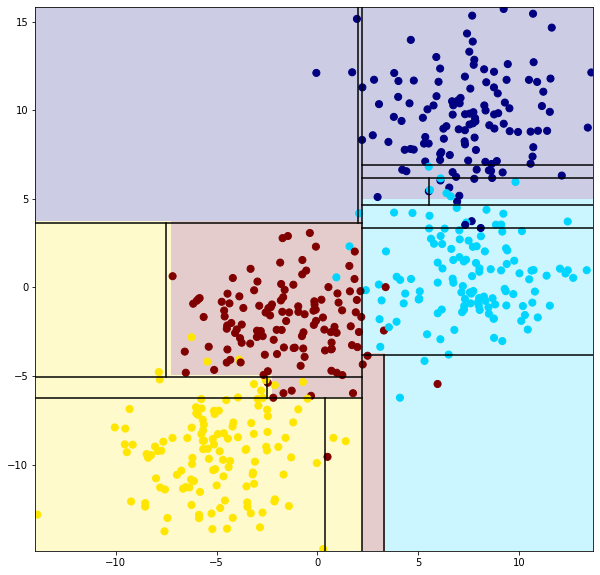

In [38]:
clf = DecisionTreeClassifier(max_depth = 4, random_state = 0)
visualize_tree(clf, X, y)

#### Decision Tree- Overfitting
Overfitting is a significant practical difficulty for decision tree models and many other predictive models. Overfitting happens when the learning algorithm continues to develop hypotheses that reduce training set error at the cost of an increased test set error. There are several approaches to avoiding overfitting in building decision trees.
1. Pre-prunning: that stop growing the tree earlier, before it perfectly classifies the training set.
2. Post-pruning: that allows the tree to perfectly classify the training set, the post prune the tree.

Practically, the second approach of post-pruning overfit trees is more successful because it is not easy to precisely estimate when to stop growing the tree. 

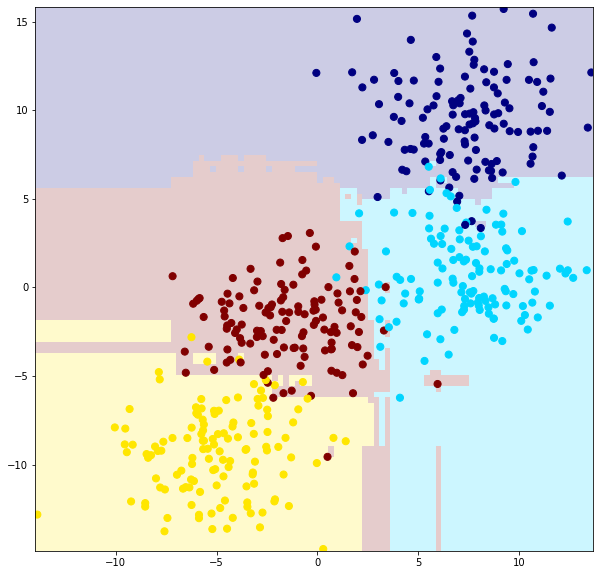

In [39]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators= 100,random_state = 0)
visualize_tree(clf, X, y, boundaries = False)

In [40]:
x = 10* np.random.rand(100)

In [41]:
def sin_model(x, sigma = 0.2):
    noise = sigma * np.random.rand(len(x))
    
    return np.sin(5*x) + np.sin(0.5 *x) + noise

In [42]:
y = sin_model(x)

<ErrorbarContainer object of 3 artists>

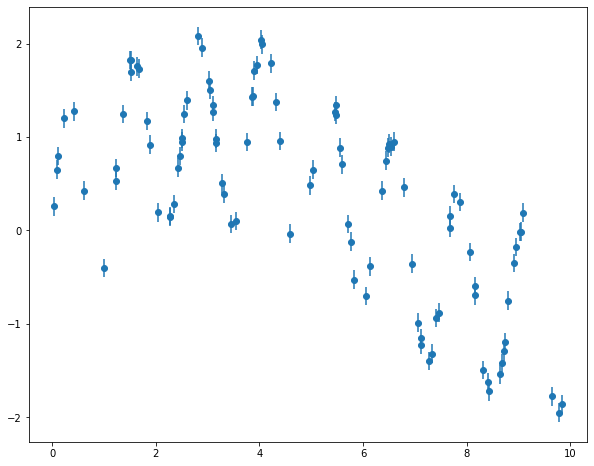

In [43]:
plt.figure(figsize =(10,8))
plt.errorbar(x, y, 0.1, fmt ='o')

In [44]:
xfit = np.linspace(0,10,1000)
from sklearn.ensemble import RandomForestRegressor

In [45]:
rfr = RandomForestRegressor(100)
rfr.fit(x[:, None], y)
yfit = rfr.predict(xfit[:, None])

In [46]:
ytrue = sin_model(xfit,0)

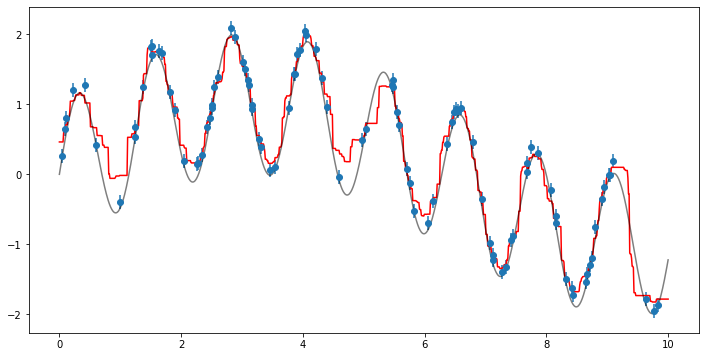

In [47]:
plt.figure(figsize=(12,6))
plt.errorbar(x,y, 0.1, fmt ='o')
plt.plot(xfit, yfit, '-r')
plt.plot(xfit, ytrue, '-k', alpha = 0.5)

## Natural Language Processing

Combining machine learning techniques with text and using math and statistics to get that text in a format that the machine learning algorithms can understand.
1. Data
2. Basic Exploratory Data Analysis
3. Text Pre-Processing
4. Vectorization
5. Model Evaluation
6. Creating a Data Pipeline

In [48]:
#!pip install NLTK

In [49]:
import nltk

In [50]:
#nltk.download()

In [51]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [52]:
print(len(messages))

5574


In [53]:
for num, message in enumerate(messages[:10]):
    print(num, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [54]:
url = 'https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/_images/plot_ML_flow_chart_31.png'
Image(url = url)

In [55]:
messages = pd.read_csv("SMSSpamCollection", sep ='\t',
                       names = ['labels','message'])

In [56]:
messages.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [57]:
messages.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [58]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   labels   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [59]:
messages.groupby('labels').describe()

message                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [60]:
messages['length'] = messages['message'].apply(len)
messages.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<AxesSubplot:ylabel='Frequency'>

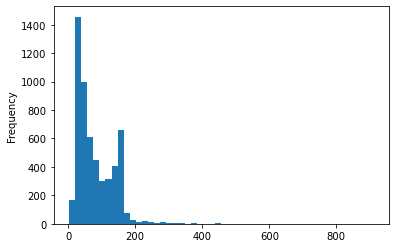

In [61]:
messages['length'].plot(bins =50, kind ='hist')

In [62]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [63]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

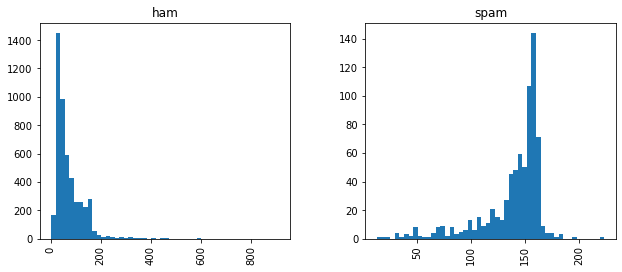

In [64]:
messages.hist(column = 'length', by ='labels', bins = 50, figsize =(10,4))

In [65]:
import string

In [66]:
mess = 'Sample message! Notice: it has puncutation'

In [67]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [68]:
nopunc = [char for char in mess if char not in string.punctuation]

In [69]:
nopunc =''.join(nopunc)

In [70]:
nopunc

'Sample message Notice it has puncutation'

In [71]:
from nltk.corpus import stopwords

In [72]:
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [73]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'puncutation']

In [74]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [75]:
clean_mess

['Sample', 'message', 'Notice', 'puncutation']

In [76]:
"""
Takes in a string of text and performs the following:
1. Remove all punctuation
2. Remove all stopwords
3. Returns a list of the cleaned text
"""

def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [77]:
messages.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [78]:
messages['message'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

Convert each message into a vector -> vectorization
We will do that in three steps using the bag-of-words model:
1. Count how many times does a word occur in each message (known as term frequency)
2. Weigh the counts, so that frequent tokens get lower weight(inverse document frequency)
3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

In [80]:
bow_transformer = CountVectorizer(analyzer = text_process)

In [81]:
bow_transformer.fit(messages['message'])

CountVectorizer(analyzer=<function text_process at 0x000002BD17AEED30>)

In [82]:
message4 = messages['message'][3]

In [83]:
print(message4)

U dun say so early hor... U c already then say...


In [84]:
bow4 = bow_transformer.transform([message4])

In [85]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [86]:
print(bow_transformer.get_feature_names()[4068])

U


In [87]:
messages_bow = bow_transformer.transform(messages['message'])

In [88]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)
print('Sparsity: %.2f%%' %(100.0 * messages_bow.nnz / (messages_bow.shape[0]* messages_bow.shape[1])))

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548
Sparsity: 0.08%


**TF: Term Frequency**, measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in a long documents than shorter ones. Thus, the term frequency is often divided by the document length as a way of normalization.

*TF(t) = (Number of times term t appears in a document) /(Total number of terms in the document).*

**IDF: Inverse Document Frequency**, measures how important a term is. While computing TF, all terms are considered equally important. However, it is known that certain terms such as "is", "of", "that", may appear a lot but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones:

*IDF(t) = log_e(Total number of documents / Number of documents with term t in it).*

**Example:**

Consider a document containing 100 words wherein the word cat appears 3 times.
The term frequency for cat is then 3/100 = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12

In [89]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [90]:
tfidf4 = tfidf_transformer.transform(bow4)

In [91]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [92]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])

3.2800524267409408


In [93]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [94]:
print(messages_tfidf.shape)

(5572, 11425)


With messages represented as vectors, we can finally train our spam/ham classifier. Now we can actually use almost any sort of classification algorithms. For a variety of reasons, the Naive Bayes classifier algorithm is a good choice. 

In [95]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['labels'])

In [96]:
print('Predicted: ', spam_detect_model.predict(tfidf4)[0])
print('Expected: ', messages['labels'][3])

Predicted:  ham
Expected:  ham


In [97]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [98]:
from sklearn.metrics import classification_report
print(classification_report(messages['labels'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [99]:
msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['labels'], test_size = 0.2)

In [100]:
print(len(msg_train), len(msg_test), len(label_train), len(label_test))

4457 1115 4457 1115


In [101]:
from sklearn.pipeline import Pipeline

In [102]:
pipeline = Pipeline([('bow', CountVectorizer(analyzer = text_process)),
                    ('tfidf', TfidfTransformer()),
                     ('classifier', MultinomialNB())
                    ])

In [103]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002BD17AEED30>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [105]:
predictions = pipeline.predict(msg_test)
                              

In [106]:
print(classification_report(predictions, label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1000
        spam       0.72      1.00      0.84       115

    accuracy                           0.96      1115
   macro avg       0.86      0.98      0.91      1115
weighted avg       0.97      0.96      0.96      1115

